# Prey-predator model

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator).

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator.



`For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$

For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$

Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

***
<a id='parameters'>
## Task-1: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number
</a>
***
Add 1 to each digit and multiply by 2 and set this value to the parameters.

__alternatively: use $(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$__

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import sympy

In [16]:
params=(2.,1.,1.,2.)
alpha=2
beta=1
gamma=1
delta=2
#3010 doesnt work XD


***
<a id='vectorfield'>
##  Task-2: Plot the vector $\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in XY plane
</a>
***

From the this plot, qualitatively say what is the behaviour!


Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; output will be the list $\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$
1. The x-range and y-range are to be determined by the steady state position determined in previous task.
2. For plotting the arrows use the function `arrow(x,y,dx,dy)` to draw arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

In [17]:
def rate_vector(pos_vector, t, alpha, beta, gamma, delta):
    x = pos_vector[0]
    y = pos_vector[1]
    dx = alpha * x - beta * x * y
    dy = gamma * x * y - delta * y
    return [dx, dy]

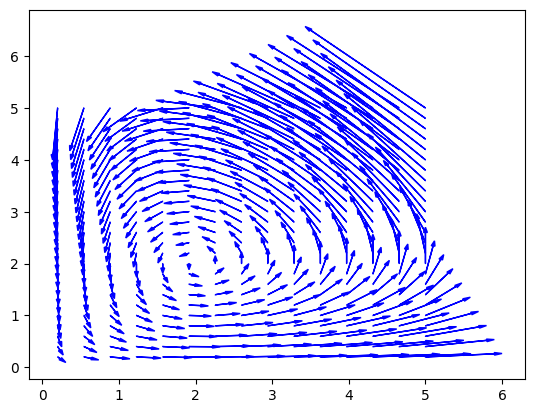

In [22]:

from matplotlib.patches import Arrow

for x in np.linspace(0.2,5,15):
    for y in np.linspace(0.2,5,25):
        r=rate_vector([x,y],1,alpha,beta,gamma,delta)
        plt.arrow(x, y, r[0]/10, r[1]/10, head_width=0.05, head_length=0.1, color='b')




***

<a id='steadystates'>
## Task-3: Find the steady states (where $\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$) by numerically solving the two coupled equations for the two unknowns $X,Y$

</a>
***

In [27]:
# Uuse scipy.optimize.fsolve as given below
from scipy.optimize import fsolve
def roots(x):
    return rate_vector(x,1,alpha,beta,gamma,delta)
x0 = fsolve(roots, [1,1])
print(x0)
x1=fsolve(roots, [2,2])
print(x1)
x2=fsolve(roots, [0.5,0.5])
print(x2)
x3=fsolve(roots, [1.5,1.5])
print(x3)
x4=fsolve(roots, [0,0])
print(x4)


[0. 0.]
[2. 2.]
[0. 0.]
[2. 2.]
[0. 0.]


In [28]:
print(x3)

[2. 2.]


***
<a id='timeevolution'>
## Task-4: Integrate the rate laws and find the evolution of system
</a>
***
Plot $X(t)$ and $Y(t)$ for some choosen values of $X(t=0)$ and $Y(t=0)$. And describe its behaviour in your own words.

Hint: use `scipy.integrate.odeint` function

In [29]:
import scipy.integrate

In [ ]:
?scipy.integrate.odeint

In [30]:
t=np.linspace(0,20,200)
r0=[1.,1.]
sol=scipy.integrate.odeint(rate_vector,r0,t,args=params)

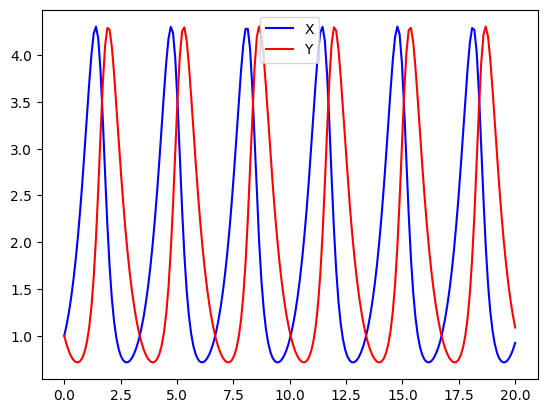

In [32]:
plot(t,sol[:,0],'b',label='X')
plot(t,sol[:,1],'r',label='Y')
legend()

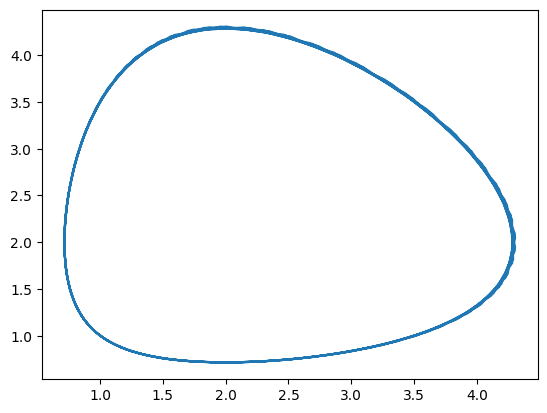

In [33]:
plot(sol[:,0],sol[:,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


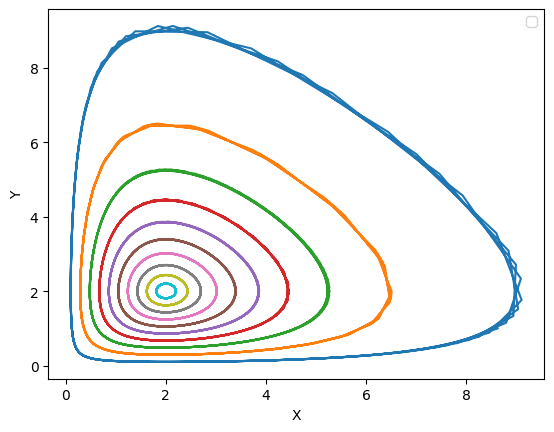

In [35]:
# PLOT X vs Y for various staring points (x0,y0)=(x0,2.)
for x in np.linspace(0.1,2,11):
    r0=[x,2.]
    sol=scipy.integrate.odeint(rate_vector,r0,t,args=params)
    plot(sol[:,0],sol[:,1])

xlabel('X')
ylabel('Y')
legend()

In [ ]:
#behaviour
#system always oscillates between certain x and y values, never reaching equilibrium

# Temporal Behavior:

# The plot of X(t) and Y(t) over time (t) shows the following characteristics:
# - Oscillatory Nature: Both X(t) and Y(t) exhibit periodic oscillations, reflecting fluctuations in population sizes over time.
# - Population Range: The amplitude of these oscillations falls within the range of approximately 0.3 to 4.3, indicating the variability in prey (X) and predator (Y) populations governed by the rate laws.
# - Periodicity: The period of oscillations is evident from the time series plots, indicating the frequency of population cycles.

# Spatial Behavior (Phase Plane):

# The phase plane trajectory (Y vs X) reveals important insights into the system's behavior in the state space:
# - Shape and Center: The trajectory forms a distinct shape centered around (2, 2) in the X-Y plane, representing stabilization or specific dynamics of prey-predator populations.
# - System Interaction: The trajectory shape illustrates how X and Y populations interact over time based on the rate laws, showing stable equilibrium or other dynamic patterns.

# Interpretation:

# The combined analysis of temporal and spatial behavior provides a comprehensive understanding of the prey-predator system:
# - Dynamic Equilibrium: Oscillatory behavior and trajectory shape suggest a dynamic equilibrium where prey-predator populations stabilize despite periodic fluctuations.
# - Interplay of Parameters: Oscillation range and trajectory shape are influenced by parameters (alpha, beta, gamma, delta) of the rate laws, reflecting sensitivity to ecological dynamics.




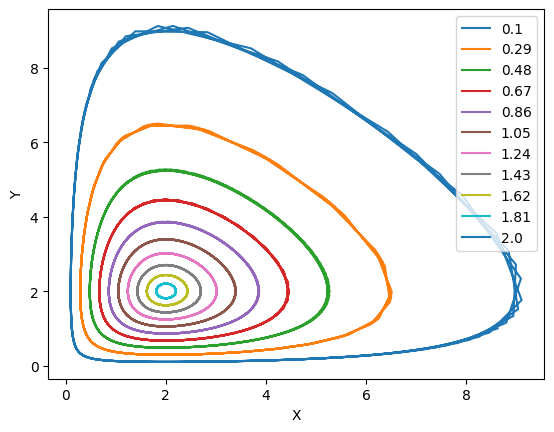

In [72]:
for x in np.linspace(0.1,2,11):
    r0=[x , 2.]
    sol=scipy.integrate.odeint(rate_vector,r0,t,args=params)
    plt.plot(sol[:,0],sol[:,1], label=round(x,2))

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

***

<a id='jacobian'>
## Task-5: Using SymPy, find the Jacobian (at any arbitrary point), and hence the Jacobian at steady state(/s)
</a>

SymPy is a bit cumbersome, you have keep track of 'variable' and 'value' types; symbolic manipulations can only be done on 'variables' and not on values (values are for typically only the arthemetic operations). Most of the code for the task is given, but try to code on your own first and then you will understand the code better.

***

In [36]:
import scipy

In [37]:
x=sympy.Symbol('x')
y=sympy.Symbol('y')

In [38]:
rMatrix = rate_vector([x,y],1,*params)
print(rMatrix)

[-1.0*x*y + 2.0*x, 1.0*x*y - 2.0*y]


In [39]:
rv2=sympy.Matrix(rMatrix)
print(rv2)

Matrix([[-1.0*x*y + 2.0*x], [1.0*x*y - 2.0*y]])


In [40]:
jacobian=sympy.Matrix(rv2).jacobian(sympy.Matrix([x,y]))
print(jacobian)

Matrix([[2.0 - 1.0*y, -1.0*x], [1.0*y, 1.0*x - 2.0]])


In [41]:
j2=(jacobian.subs(x,2)).subs(y,2)
print(j2)

Matrix([[0, -2.00000000000000], [2.00000000000000, 0]])


In [42]:
j1=(jacobian.subs(x,0)).subs(y,0)
print(j1)

Matrix([[2.00000000000000, 0], [0, -2.00000000000000]])


In [51]:
# np.linalg.eig(j1)
j1_np = np.array(j1).astype(float)
eigenvalues, eigenvectors = np.linalg.eig(j1_np)
print(eigenvalues)
print(eigenvectors)

[ 2. -2.]
[[1. 0.]
 [0. 1.]]


In [44]:
j2=np.array(j2).astype(float32)
print(j2)

[[ 0. -2.]
 [ 2.  0.]]


In [45]:
np.linalg.eig(j2)

EigResult(eigenvalues=array([0.+2.j, 0.-2.j], dtype=complex64), eigenvectors=array([[0.        +0.70710677j, 0.        -0.70710677j],
       [0.70710677+0.j        , 0.70710677-0.j        ]], dtype=complex64))

***
<a id='geometric'>
## Task-6: Geometric Interpretation of Matrix (through its operation on vectors)
</a>
***

One of the common operations is matrix operation on vector, and many of the times of specific interest is multiple repeated operations of matrix on vector.

Consider $\textbf A$, an arbitrary $2\times 2$ matrix. For a arbirtary unit vector $\vec x$, plot $\textbf A \vec x$. From this plot, can you generalise the operation $\textbf A \vec x$.

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$.

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$).

[ 6.58257569 -2.58257569]
[[ 0.74490545 -0.58243756]
 [ 0.66717004  0.81287544]]


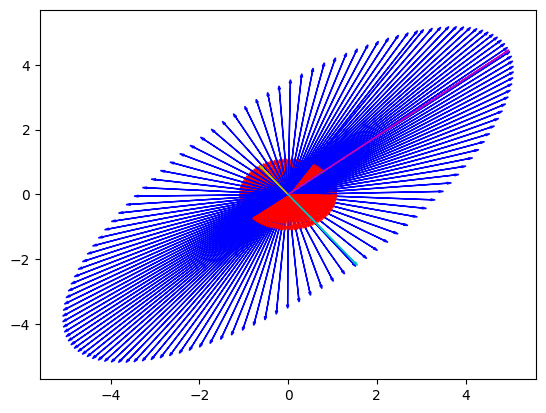

In [59]:
import math
xv=np.arange(0,2*np.pi,0.05)
A=[[3,4],[5,1]]
for i in xv:
    x=math.cos(i)
    y=math.sin(i)
    matrix2=[x,y]
    matrix2=np.dot(A,matrix2)
    plt.arrow(0,0,matrix2[0],matrix2[1],head_width=0.05,head_length=0.1,color='b')
    plt.arrow(0,0, x, y , head_width=0.05,head_length=0.1,color='r')

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

plt.arrow(0,0,eigenvectors[0,0],eigenvectors[1,0],head_width=0.05,head_length=0.1,color='g')
plt.arrow(0,0,eigenvectors[0,1],eigenvectors[1,1],head_width=0.05,head_length=0.1,color='y')

plt.arrow(0,0,eigenvalues[0]*eigenvectors[0,0],eigenvalues[0]*eigenvectors[1,0],head_width=0.05,head_length=0.1,color='m')
plt.arrow(0,0,eigenvalues[1]*eigenvectors[0,1],eigenvalues[1]*eigenvectors[1,1],head_width=0.05,head_length=0.1,color='c')

plt.show()

[ 6.58257569 -2.58257569]
[[ 0.74490545 -0.58243756]
 [ 0.66717004  0.81287544]]


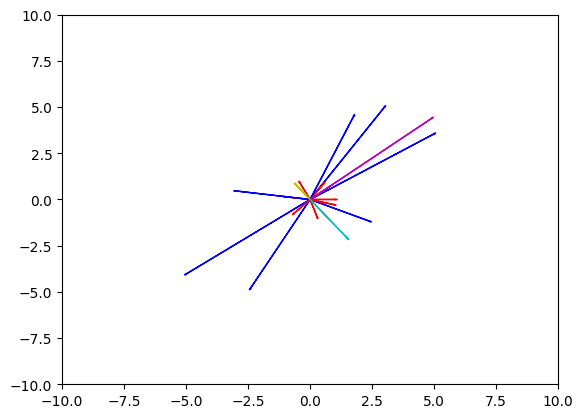

In [61]:
import math
plt.xlim(-10,10)
plt.ylim(-10,10)
xv=np.arange(0,2*np.pi,1) #for better visualization, we can increase the step size (0.05 to 1)
A=[[3,4],[5,1]]
for i in xv:
    x=math.cos(i)
    y=math.sin(i)
    matrix2=[x,y]
    matrix2=np.dot(A,matrix2)
    plt.arrow(0,0,matrix2[0],matrix2[1],head_width=0.05,head_length=0.1,color='b')
    plt.arrow(0,0, x, y , head_width=0.05,head_length=0.1,color='r')

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

plt.arrow(0,0,eigenvectors[0,0],eigenvectors[1,0],head_width=0.05,head_length=0.1,color='g')
plt.arrow(0,0,eigenvectors[0,1],eigenvectors[1,1],head_width=0.05,head_length=0.1,color='y')

plt.arrow(0,0,eigenvalues[0]*eigenvectors[0,0],eigenvalues[0]*eigenvectors[1,0],head_width=0.05,head_length=0.1,color='m')
plt.arrow(0,0,eigenvalues[1]*eigenvectors[0,1],eigenvalues[1]*eigenvectors[1,1],head_width=0.05,head_length=0.1,color='c')

plt.show()

In [71]:
# Select a few arbitrary unit vectors
x_values = [np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0, 2*np.pi, num=10)]

for x in x_values:
    b = np.dot(A, x)

    # Project x and b onto the eigenvectors
    x_projections = [np.dot(x, v) / np.dot(v, v) * v for v in eigenvectors.T]
    b_projections = [np.dot(b, v) / np.dot(v, v) * v for v in eigenvectors.T]

    # Check if b_projections[i] = lambda_i * x_projections[i]
    check = np.allclose(b_projections, [l * p for l, p in zip(eigenvalues, x_projections)])
    print(b_projections)
    #print([l * p for l, p in zip(eigenvalues, x_projections)])

    print(f"For x = {x}, the statement 'b_projections[i] = lambda_i * x_projections[i]' is {'false' if check else 'true'}")


[array([4.14954542, 3.71651514]), array([-1.34954542,  1.88348486])]
For x = [1. 0.], the statement 'b_projections[i] = lambda_i * x_projections[i]' is true
[array([4.92487848, 4.41093749]), array([-0.46591865,  0.65025653])]
For x = [0.76604444 0.64278761], the statement 'b_projections[i] = lambda_i * x_projections[i]' is true
[array([3.39580617, 3.04143316]), array([ 0.63571664, -0.88723406])]
For x = [0.17364818 0.98480775], the statement 'b_projections[i] = lambda_i * x_projections[i]' is true
[array([0.27779841, 0.24880846]), array([ 1.43989304, -2.00957797])]
For x = [-0.5        0.8660254], the statement 'b_projections[i] = lambda_i * x_projections[i]' is true
[array([-2.97019431, -2.66023649]), array([ 1.57032749, -2.19161802])]
For x = [-0.93969262  0.34202014], the statement 'b_projections[i] = lambda_i * x_projections[i]' is true
[array([-4.82840011, -4.32452722]), array([ 0.96598825, -1.34817563])]
For x = [-0.93969262 -0.34202014], the statement 'b_projections[i] = lambda_

***
<a id='eigensystem'>
## Task: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors
</a>
***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.

In [ ]:
# In the 0,0 point, the steady state is in unstable equilibrium. 
# In the 2,2 point, the steady state is in stable equilibrium. 


#The (0,0) steady state represents the extinction of both species.
# This is an unstable equilibrium because any small perturbation (like the introduction of a few preys or predators) 
#will move the system away from this state. 
#For example, if a few preys are introduced(dx/dt increased), their population will grow (since there are no predators),
# which in turn could attract predators(dx/dt) and thus move the system away from the (0,0) state.

#The (2,2) steady state represents a situation where both the prey and predator populations are stable at 2 units. 
#This is a stable equilibrium because small perturbations will not move the system away from this state. 
#If the prey population increases slightly(dx/dt), it will lead to an increase in the predator population (dy/dt)
#(since there's more food available), which will then bring down the prey population (due to increased predation), 
#bringing the system back to the (2,2) state. Similarly, 
#a small decrease in the prey population will lead to a decrease in the predator population (due to less food), 
#which will allow the prey population to recover, again bringing the system back to the (2,2) state.

#essentially, the (0,0) state is like a ball balanced on top of a hill,
# while the (2,2) state is like a ball settled at the bottom of a bowl.
# The ball on top of the hill is in unstable equilibrium because any small push will send it rolling down the hill,
# while the ball at the bottom of the bowl is in stable equilibrium because it will return to its original position
#the system in any state will always move towards the (2,2) state.


#unstable equilibrium has complex eigenvalues, as determined by the jacobian
#stable equilibrium has real negative eigenvalues, as determined by the jacobian

# Real vs. Complex Eigenvalues:

# - Eigenvalues (λ) of A determine stability:

# - Stable if all λ_i have negative real parts.

# - Unstable if any λ_i has a positive real part.

# - Complex eigenvalues arise in systems with oscillatory or spiraling behavior.
